In [48]:
import warnings
warnings.filterwarnings('ignore')
import quandl
import pickle
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import time, datetime
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
style.use('ggplot')

In [61]:
df = pd.read_csv('data/train.csv')
df_t.head()

1628

In [50]:
df.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
0,3,2,4,2,2,2,1
1,3,2,2,5,2,1,1
2,1,4,2,5,1,3,1
3,4,4,2,2,1,2,1
4,3,3,3,4,3,3,2


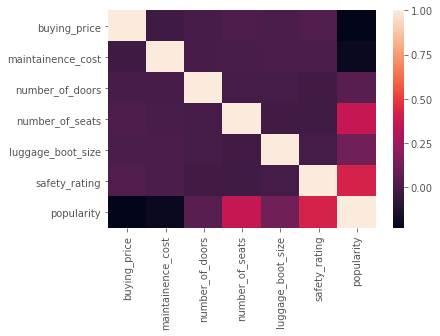

In [51]:
cor = df.corr()
sns.heatmap(cor)

In [52]:
X = np.array(df.drop(['popularity',''],1))
Y = np.array(df['popularity'])
# X = preprocessing.scale(X)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.0)

In [54]:
# clf = LinearRegression()
# clf = LogisticRegressionCV()
# clf = GradientBoostingClassifier()
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.02,
                                   max_depth=4,
                                   min_samples_leaf=15, min_samples_split=10, random_state =5)
# clf = svm.SVC(C=1,gamma=.002)

clf.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=15, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=5, subsample=1.0, verbose=0,
              warm_start=False)

In [60]:
# clf.score(X_test,Y_test)
clf.feature_importances_

array([ 0.17668996,  0.14731568,  0.04102323,  0.24052002,  0.10965256,
        0.28479855])

In [56]:
test = pd.read_csv('data/test.csv')
test.head()

,4,1,2,2.1,2.2,2.3
0,2,1,3,4,3,2
1,4,4,2,5,1,2
2,4,3,3,2,2,2
3,4,2,2,4,3,2
4,4,3,5,2,3,3


In [57]:
X_t = np.array(test)
# X_t = preprocessing.scale(X_t)
clf.predict(X_t)

array([2, 1, 1, 2, 1, 4, 3, 4, 1, 2, 2, 4, 3, 1, 3, 1, 2, 1, 2, 2, 4, 2, 4,
       2, 3, 2, 4, 2, 3, 2, 1, 3, 4, 4, 1, 3, 4, 1, 4, 4, 1, 2, 2, 3, 1, 1,
       2, 3, 1, 1, 2, 2, 1, 4, 4, 2, 1, 4, 2, 4, 2, 3, 3, 4, 2, 4, 1, 1, 2,
       4, 4, 2, 1, 2, 1, 1, 4, 2, 3, 2, 4, 3, 2, 4, 4, 4, 2, 4, 2, 1, 2, 2,
       2, 4, 1, 2, 4, 4, 1])

In [58]:
# out = pd.DataFrame()

out =pd.DataFrame(clf.predict(X_t))

In [59]:
out.to_csv('out.csv',index=None)